# Ejercicios y Problemas.

1.1 Encontrar, usando el método de AGs, la raíz real del polinomio P(x) = 5x5- 3x4-x3-5x2-x-3 en el
intervalo [0.5 1], usando números reales, una población de 100 listas, un solo tipo de cruce y
selección por clasificación. Dibuje un cuadro de aptitud contra generación.

Adaptación del codigo creado por Andrés Holguín & Sara Jimenez


## Cómo Utilizar

1. Clona o descarga este repositorio a tu máquina local.

2. Ejecuta el código jupyter notebook en tu entorno Python.

3. Ajusta los parámetros según tus necesidades:

   - `len_chrom`: Longitud del cromosoma (representación binaria de "x").
   - `K`: Tamaño de la población.
   - `M`: Número de generaciones.
   - `pm`: Tasa de mutación.

4. Define tu función objetivo en la función `equation(x)`. El objetivo es encontrar el valor de "x" que minimiza esta función.

5. Ejecuta el código y observa cómo evoluciona la población de soluciones hacia el mínimo de la función.

6. El código mostrará la generación actual, el mejor valor de "x" encontrado hasta el momento y el valor de la función en ese punto. Si se encuentra una solución que cumple con un criterio de parada (en este caso, cuando el valor de la función es cercano a cero), se mostrará y se detendrá el proceso.

7. Después de finalizar la ejecución, se mostrarán gráficos que representan la evolución de los valores y la aptitud máxima a lo largo de las generaciones.

## Estructura del Código

El código se divide en las siguientes funciones principales:

- `generate_population(K, len_chrom)`: Genera una población inicial de soluciones aleatorias.
- `evaluate_fitness(population)`: Evalúa la aptitud de cada solución en función de la función objetivo.
- `function_result(chromosome)`: Decodifica un cromosoma en un valor "x" y calcula el valor de la función.
- `decode(chromosome)`: Decodifica un cromosoma binario en un valor real.
- `crossover(population, probabilities)`: Realiza la recombinación (crossover) entre soluciones.
- `mutation(population, pm)`: Aplica mutaciones a la población.
- `roulette_selection(population, probabilities)`: Realiza la selección de soluciones mediante ruleta.
- Bucle principal del Algoritmo Genético: Evoluciona la población a lo largo de varias generaciones.

## Resultados

El código mostrará los resultados en la consola, incluyendo la generación actual, el mejor valor de "x" encontrado y el valor de la función en ese punto. Si se alcanza una solución que cumple con el criterio de parada, se mostrará y se detendrá el proceso. Además, se generarán gráficos que representan la evolución de los valores y la aptitud máxima a lo largo de las generaciones.


In [20]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [21]:
len_chrom = 100
K = 10
M = 200
pm = 1/len_chrom

def equation(x):
    return (5*x**5) - (3*x**4) - (x**3) - (5*x**2) - x - 3
    
def generate_population(K, len_chrom):
    population = np.random.randint(2, size=(K, len_chrom))
    return population
    
def evaluate_fitness(population):
    x_values = np.zeros(K, dtype=float)
    probabilities = np.zeros(K, dtype=float) 
    aptitudes = np.zeros(K, dtype=float) 
  
    for i in range(K):
        t, x = function_result(population[i])
        x_values[i] = x
        aptitudes[i] = (10 - abs(t)) * 100
        
    total_aptitude = float(np.sum(aptitudes))
    probabilities = [apt / total_aptitude for apt in aptitudes]
    max_prob_index = np.argmax(probabilities)
    probabilities[max_prob_index] = 0.99
    
    return probabilities, x_values, max(aptitudes)
    
def function_result(chromosome):
    x = decode(chromosome)
    func_value = equation(x)
    return func_value, x

def decode(chromosome):
    xi = 0.5  
    xf = 1  
    Max = 2 ** len_chrom
    chrom_pot = [chromosome[i] * 2 ** (len_chrom - i - 1) for i in range(len_chrom)]
    decimal_value = sum(chrom_pot) 
    chrom_pot = 0
    decoded_value = ((xf - xi) / Max) * decimal_value + xi 
    return decoded_value

In [22]:
def crossover(population, probabilities): 
    max_prob_index = np.argmax(probabilities)
    
    i = 0
    while i < K - 1:
        best_chrom = population[max_prob_index]
        
        if probabilities[i] < 0.97:
            rand = random.randint(2, len_chrom - 1)  
            parent1 = population[i]
            parent2 = population[i + 1]
            j = rand
            while j < len_chrom:
                bit = parent1[j]
                parent1[j] = parent2[j]
                parent2[j] = bit
                j += 1  
        else:
            if max_prob_index % 2 == 0:
                population[i] = best_chrom
            else:
                population[i + 1] = best_chrom 
        i += 2
    return population
    
def mutation(population, pm):
    total_bits = K * len_chrom
    segment = 1 / pm
    n_segments = total_bits / segment
    i = 0
    while i < n_segments - 1:
        aleatory = random.randint(0, segment - 1)
        pos = int(i * segment + aleatory)
        y = int((pos / len_chrom))
        chromosome = population[y]
        x = pos - len_chrom * y 
        if chromosome[x - 1] == 0:
            chromosome[x - 1] = 1
        else:
            chromosome[x - 1] = 0
        i += 1    
    return population
    
def roulette_selection(population, probabilities):
    chosen = []
    while len(chosen) < K:
        r = random.random()
        for (i, individual) in enumerate(population):
            if r <= probabilities[i]:
                chosen.append(list(individual))
                break
    return chosen

Generation  0 Best x 0.5686530684227858 best solution  -5.3857569557109635
Generation  1 Best x 0.568651161074153 best solution  -5.385743129192111
Generation  2 Best x 0.5686511014695083 best solution  -5.385742697113788
Generation  3 Best x 0.56865062463235 best solution  -5.3857392404880535
Generation  4 Best x 0.568650624632343 best solution  -5.385739240488001
Generation  5 Best x 0.5686506246314335 best solution  -5.385739240481408
Generation  6 Best x 0.5647443746314335 best solution  -5.35747391260133
Generation  7 Best x 0.5647443597302723 best solution  -5.357473804975401
Generation  8 Best x 0.564744356004982 best solution  -5.357473778068918
Generation  9 Best x 0.5647441175864029 best solution  -5.357472056054264
Generation  10 Best x 0.5647441157237577 best solution  -5.357472042601026
Generation  11 Best x 0.5647441156946539 best solution  -5.357472042390819
Generation  12 Best x 0.564744115694597 best solution  -5.357472042390409
Generation  13 Best x 0.5647441152289358

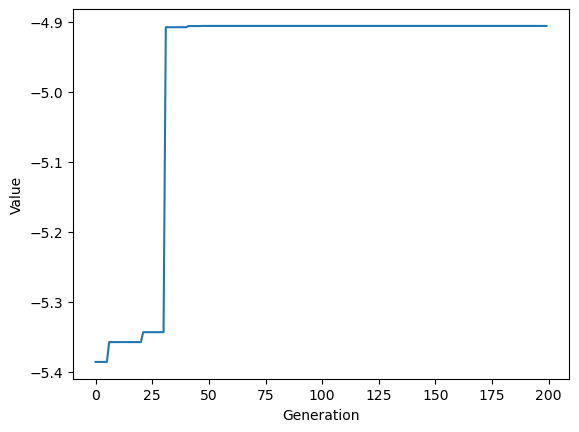

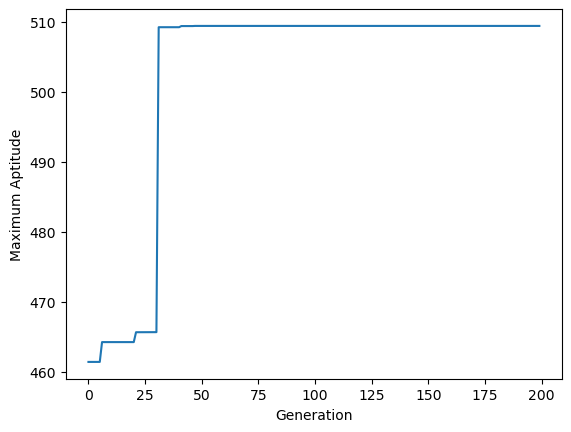

In [23]:
population3 = generate_population(K, len_chrom) 
prob_chromosome, x_values, AptI = evaluate_fitness(population3)
i = 0

Px = []
Py = []
PaptI = []

while i < M:
    old_population = population3
    new_population1 = roulette_selection(old_population, prob_chromosome)
    new_population2 = crossover(new_population1, prob_chromosome)
    population3 = mutation(new_population2, pm)
    prob_chromosome, x_values, AptI = evaluate_fitness(population3)
    max_prob = np.amax(prob_chromosome)
    max_prob_index = np.argmax(prob_chromosome)
    best_x = x_values[max_prob_index]
    value = equation(best_x)
    print("Generation ", i, "Best x", best_x, "best solution ", value)
    if abs(value) < 0.00001:
        print()
        print("Best Solution x", best_x, " with F(x) = ", value)
        i = M
    Px.append(i)
    Py.append(value)
    PaptI.append(AptI)
    i += 1

plt.plot(Px, Py)
plt.xlabel('Generation')
plt.ylabel('Value')
plt.show()

plt.plot(Px, PaptI)
plt.xlabel('Generation')
plt.ylabel('Maximum Aptitude')
plt.show()

1.2 Suponga que tiene una lista de 15 alimentos con número de calorías, gramos de proteína,
gramos de grasa y gramos de carbohidratos. Suponga que un individuo debe consumir determinada
cantidad de calorías, proteínas, grasa y carbohidratos. Genere una dieta para ese individuo.

# Optimización de la Dieta con Algoritmo Genético

Este ejercicio es una implementación de un algoritmo genético para optimizar un plan de dieta que cumpla con requisitos nutricionales específicos. El código se ha desarrollado en Python y se utiliza para encontrar un plan de dieta que se acerque lo más posible a las metas de calorías, proteínas, grasas y carbohidratos definidas por el usuario.

## Cómo Utilizar

1. Clona o descarga este repositorio a tu máquina local.

2. Ejecuta el código de el jupyter notebook en tu entorno Python.

3. Ajusta los parámetros según tus necesidades:

   - `target_calories`: Define el objetivo de calorías para tu dieta.
   - `target_protein`: Define el objetivo de proteínas en gramos.
   - `target_fat`: Define el objetivo de grasas en gramos.
   - `target_carbs`: Define el objetivo de carbohidratos en gramos.
   - `population_size`: Tamaño de la población de planes de dieta.
   - `mutation_rate`: Tasa de mutación para la introducción de variabilidad en la población.
   - `generations`: Número de generaciones o iteraciones del algoritmo.

4. Ejecuta el código y observa cómo evoluciona la población de planes de dieta hacia una solución óptima.

5. Una vez que el algoritmo haya terminado, se imprimirá el plan de dieta óptimo y los valores nutricionales alcanzados.

## Estructura del Código

- `initialize_population()`: Inicializa una población de planes de dieta aleatorios.
- `calculate_fitness(diet_plan)`: Calcula la aptitud de un plan de dieta en función de su proximidad a los objetivos nutricionales.
- `crossover(parent1, parent2)`: Realiza el cruce (crossover) entre dos planes de dieta para generar descendencia.
- `mutate(diet_plan)`: Aplica mutaciones a un plan de dieta.
- Bucle principal del Algoritmo Genético: Evoluciona la población de planes de dieta a lo largo de varias generaciones.
- `calculate_nutritional_values(diet_plan)`: Calcula los valores nutricionales totales para un plan de dieta dado.

## Resultados

Los resultados finales incluyen el plan de dieta óptimo, las comidas seleccionadas y los valores nutricionales totales, incluyendo proteínas, grasas, carbohidratos y calorías.

In [24]:
import pandas as pd

In [25]:
food_df = pd.read_csv('./nutrients_csvfile.csv', delimiter=',')

In [26]:
food_df

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"


In [27]:
shuffled_df = food_df.sample(frac=1, random_state=42)
menu_df = shuffled_df[:15]
menu_df = menu_df.replace('t', 0)
menu_df

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
25,Swiss,1 oz.,28,105,7,8,7,0,0,Dairy products
109,Celery,1 cup,100,20,1,0,0,1,4,Vegetables A-E
76,Flounder,3 1/2 oz.,100,200,30,8,0,0,0,"Fish, Seafood"
196,Frozen,6-oz. can,210,330,2,0,0,0.4,78,Fruits G-P
57,Roasted chicken,3 1/2 oz.,100,290,25,20,16,0,0,"Meat, Poultry"
255,Spaghetti with meat sauce,1 cup,250,285,13,10,6,0.50,35,"Breads, cereals, fastfood,grains"
182,"Fruit cocktail, canned",1 cup,256,195,1,0,0,0.5,50,Fruits A-F
181,figs Canned with syrup,3,115,130,1,0,0,1,32,Fruits A-F
274,Apple betty,1 serving,100,150,1,4,0,0.5,29,"Desserts, sweets"
198,Peaches,1 cup,257,200,1,0,0,1,52,Fruits G-P


In [28]:
menu_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 25 to 172
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      15 non-null     object
 1   Measure   15 non-null     object
 2   Grams     15 non-null     object
 3   Calories  15 non-null     object
 4   Protein   15 non-null     object
 5   Fat       15 non-null     object
 6   Sat.Fat   15 non-null     object
 7   Fiber     15 non-null     object
 8   Carbs     15 non-null     object
 9   Category  15 non-null     object
dtypes: object(10)
memory usage: 1.3+ KB


In [29]:
foods = menu_df.to_dict(orient='records')
foods

[{'Food': 'Swiss',
  'Measure': '1 oz.',
  'Grams': '28',
  'Calories': '105',
  'Protein': '7',
  'Fat': '8',
  'Sat.Fat': '7',
  'Fiber': '0',
  'Carbs': 0,
  'Category': 'Dairy products'},
 {'Food': 'Celery',
  'Measure': '1 cup',
  'Grams': '100',
  'Calories': '20',
  'Protein': '1',
  'Fat': 0,
  'Sat.Fat': '0',
  'Fiber': '1',
  'Carbs': '4',
  'Category': 'Vegetables A-E'},
 {'Food': 'Flounder',
  'Measure': '3 1/2 oz.',
  'Grams': '100',
  'Calories': '200',
  'Protein': '30',
  'Fat': '8',
  'Sat.Fat': '0',
  'Fiber': '0',
  'Carbs': '0',
  'Category': 'Fish, Seafood'},
 {'Food': 'Frozen ',
  'Measure': '6-oz. can',
  'Grams': '210',
  'Calories': '330',
  'Protein': '2',
  'Fat': 0,
  'Sat.Fat': 0,
  'Fiber': '0.4',
  'Carbs': '78',
  'Category': 'Fruits G-P'},
 {'Food': 'Roasted chicken',
  'Measure': '3 1/2 oz.',
  'Grams': '100',
  'Calories': '290',
  'Protein': '25',
  'Fat': '20',
  'Sat.Fat': '16',
  'Fiber': '0',
  'Carbs': '0',
  'Category': 'Meat, Poultry'},
 {'Foo

In [30]:
import random

# Define the target nutritional requirements
target_calories = 2000
target_protein = 70
target_fat = 50
target_carbs = 45

# Genetic Algorithm parameters
population_size = 100
mutation_rate = 0.01
generations = 100

def initialize_population():
    population = []
    for _ in range(population_size):
        diet_plan = [random.randint(0, 1) for _ in range(len(foods))]
        population.append(diet_plan)
    return population

def calculate_fitness(diet_plan):
    total_calories = sum(diet_plan[i] * int(foods[i]['Calories']) for i in range(len(foods)))
    total_protein = sum(diet_plan[i] * int(foods[i]['Protein']) for i in range(len(foods)))
    total_fat = sum(diet_plan[i] * int(foods[i]['Fat']) for i in range(len(foods)))
    total_carbs = sum(diet_plan[i] * int(foods[i]['Carbs']) for i in range(len(foods)))
    
    fitness = abs(total_calories - target_calories) + \
              abs(total_protein - target_protein) + \
              abs(total_fat - target_fat) + \
              abs(total_carbs - target_carbs)
    return fitness

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(foods) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(diet_plan):
    for i in range(len(diet_plan)):
        if random.random() < mutation_rate:
            diet_plan[i] = 1 - diet_plan[i]
    return diet_plan

# Main GA loop
population = initialize_population()

for generation in range(generations):
    population = sorted(population, key=lambda x: calculate_fitness(x))
    fittest_diet_plan = population[0]
    fitness = calculate_fitness(fittest_diet_plan)
    
    if fitness == 0:
        break
    
    new_population = [fittest_diet_plan]
    
    while len(new_population) < population_size:
        parent1, parent2 = random.choices(population[:10], k=2)
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.extend([child1, child2])
    
    population = new_population

# Calculate the sum of protein, carbohydrates, fat, and calories for the final diet plan
def calculate_nutritional_values(diet_plan):
    total_protein = sum(diet_plan[i] * int(foods[i]['Protein']) for i in range(len(foods)))
    total_fat = sum(diet_plan[i] * int(foods[i]['Fat']) for i in range(len(foods)))
    total_carbs = sum(diet_plan[i] * int(foods[i]['Carbs']) for i in range(len(foods)))
    total_calories = sum(diet_plan[i] * int(foods[i]['Calories']) for i in range(len(foods)))
    return total_protein, total_fat, total_carbs, total_calories

final_protein, final_fat, final_carbs, final_calories = calculate_nutritional_values(fittest_diet_plan)

# Print the final results
print("Optimal Diet Plan:")
print('----------------------------------------')
for i in range(len(foods)):
    if fittest_diet_plan[i] == 1:
        print(f"{foods[i]['Food']} - {foods[i]['Grams']} grams")

print('----------------------------------------')
print(f"Total Protein: {final_protein} grams")
print(f"Total Fat: {final_fat} grams")
print(f"Total Carbohydrates: {final_carbs} grams")
print(f"Total Calories: {final_calories} kcal")

Optimal Diet Plan:
----------------------------------------
Swiss - 28 grams
Celery - 100 grams
Roasted chicken - 100 grams
figs Canned with syrup  - 115 grams
Apple betty - 100 grams
Clams - 85 grams
(1/2 cup ice cream) - 540 grams
Split-pea soup - 250 grams
Peanut butter - 50 grams
Blackberries - 144 grams
----------------------------------------
Total Protein: 93 grams
Total Fat: 86 grams
Total Carbohydrates: 190 grams
Total Calories: 2004 kcal


2. En el siguiente enlace se encuentra un programa Python para la solución del TSP (Traveling
Salesman Problem):
https://github.com/rocreguant/personal_blog/blob/main/Genetic_Algorithm_Python_Example/Traveling_Salesman_Problem.ipynb
Estúdielo y úselo como laboratorio, usando diferentes tipos de selección y diferente número de
generaciones. Imprima las gráficas correspondientes.

# Travelling Salesperson Problem solved using genetic algorithms

In [12]:
# Imports 
import numpy as np
import random
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
# Parameters
n_cities = 20

n_population = 100

mutation_rate = 0.3

In [3]:
# Generating a list of coordenades representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,100,n_cities),np.random.randint(0,100,n_cities))]
names_list = np.array(['Berlin', 'London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv', 'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

cities_dict

{'Berlin': [56, 19],
 'London': [48, 10],
 'Moscow': [10, 66],
 'Barcelona': [68, 15],
 'Rome': [37, 32],
 'Paris': [48, 85],
 'Vienna': [11, 23],
 'Munich': [80, 18],
 'Istanbul': [43, 45],
 'Kyiv': [3, 78],
 'Bucharest': [45, 57],
 'Minsk': [80, 65],
 'Warsaw': [67, 60],
 'Budapest': [35, 99],
 'Milan': [20, 33],
 'Prague': [66, 72],
 'Sofia': [68, 6],
 'Birmingham': [54, 2],
 'Brussels': [2, 67],
 'Amsterdam': [83, 18]}

## 1. Create the first population set
We randomly shuffle the cities N times where N=population_size

In [4]:
# First step: Create the first population set
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)
population_set

array([['Budapest', 'Bucharest', 'Barcelona', ..., 'Munich', 'Brussels',
        'Istanbul'],
       ['Munich', 'Istanbul', 'Paris', ..., 'Bucharest', 'Sofia',
        'Milan'],
       ['Istanbul', 'Moscow', 'Munich', ..., 'London', 'Barcelona',
        'Budapest'],
       ...,
       ['Berlin', 'Barcelona', 'Moscow', ..., 'Rome', 'Brussels', 'Kyiv'],
       ['Birmingham', 'Milan', 'Brussels', ..., 'Berlin', 'Munich',
        'Warsaw'],
       ['Berlin', 'Istanbul', 'Kyiv', ..., 'Birmingham', 'Paris',
        'Warsaw']], dtype='<U10')

## 2. Evaluate solutions fitness
The solutions are defined so that the first element on the list is the first city to visit, then the second, etc. and the last city is linked to the first.
The fitness function needs to compute the distance between subsequent cities.

In [5]:
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total

In [6]:
def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

fitnes_list = get_all_fitnes(population_set,cities_dict)
fitnes_list

array([1015.11317108,  958.3733596 ,  951.40307692,  988.13753727,
        929.03892754, 1042.82036668,  944.91472357,  851.59721429,
        912.21988637, 1033.05313477,  960.06935666,  832.00923219,
       1036.27011775,  961.90206461, 1009.71580362,  855.0915916 ,
        972.58423767, 1096.69413207,  954.41464607,  986.13568059,
        911.9273315 ,  853.36957618, 1038.64074618, 1152.79363617,
       1040.33555011, 1172.08659419,  995.86440972,  745.90475656,
        914.05726455, 1142.72812339, 1030.59641637,  910.29587506,
        721.14490729, 1035.01564473, 1089.36807733,  913.329262  ,
       1004.04214028,  837.98851893,  829.44461334, 1003.21515012,
        795.5704863 ,  835.03349381,  951.66734497, 1030.96321062,
       1100.50526888, 1016.16873508,  992.87435088,  914.43906799,
        951.09141319,  990.89200791, 1055.03746861,  961.17801275,
       1001.11181144,  831.48370915,  789.40071657,  851.73659677,
       1041.14451086,  866.25629859, 1085.76973892, 1025.48897

# 3. Progenitors selection
I will select a new set of progenitors using the Roulette Wheel Selection. Generates a list of progenitor pairs where N= len(population_set) but at each position there are two solutions to merge

In [7]:
def progenitor_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = fitnes_list/total_fit
    
    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    
    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]
    
    
    return np.array([progenitor_list_a,progenitor_list_b])


progenitor_list = progenitor_selection(population_set,fitnes_list)
progenitor_list[0][2]

array(['Birmingham', 'Paris', 'Vienna', 'Barcelona', 'Berlin', 'Budapest',
       'Minsk', 'Warsaw', 'Sofia', 'Prague', 'Amsterdam', 'Munich',
       'Istanbul', 'Bucharest', 'Rome', 'London', 'Moscow', 'Brussels',
       'Milan', 'Kyiv'], dtype='<U10')

# 4. Mating
For each pair of  parents we'll generate an offspring pair. Since we cannot repeat cities what we'll do is copy a random chunk from one progenitor and fill the blanks with the other progenitor.

In [8]:
def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:5]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring
            
    
    
def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)
        
    return new_population_set

new_population_set = mate_population(progenitor_list)
new_population_set[0]

array(['Berlin', 'London', 'Kyiv', 'Barcelona', 'Warsaw', 'Bucharest',
       'Rome', 'Munich', 'Birmingham', 'Milan', 'Prague', 'Minsk',
       'Paris', 'Vienna', 'Istanbul', 'Moscow', 'Sofia', 'Amsterdam',
       'Budapest', 'Brussels'], dtype='<U10')

# 5. Mutation
Now for each element of the new population we add a random chance of swapping

In [9]:
def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring
    
    
def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

mutated_pop = mutate_population(new_population_set)
mutated_pop[0]

array(['Istanbul', 'London', 'Brussels', 'Barcelona', 'Milan',
       'Bucharest', 'Rome', 'Munich', 'Birmingham', 'Prague', 'Paris',
       'Minsk', 'Warsaw', 'Vienna', 'Kyiv', 'Moscow', 'Sofia',
       'Amsterdam', 'Budapest', 'Berlin'], dtype='<U10')

# 6. Stopping
To select the stopping criteria we'll need to create a loop to stop first. Then I'll set it to loop at 1000 iterations.

0 794.2450612959889 953.5142804871891 26/11/23 13:40
100 688.7847428284165 942.7903902229837 26/11/23 13:40
200 739.7587054694726 950.4658621244276 26/11/23 13:40
300 743.4761566111824 945.8888673240472 26/11/23 13:40
400 685.9534528780032 952.5396444399557 26/11/23 13:40
500 771.1144813782408 953.9289831455046 26/11/23 13:40
600 796.5610934599084 953.0933994054777 26/11/23 13:40
700 680.8502912989522 956.9866235776415 26/11/23 13:40
800 587.727313257679 954.1066633163651 26/11/23 13:40
900 754.7550553453658 971.6633202655009 26/11/23 13:40
1000 691.1881540056557 957.6764611758324 26/11/23 13:40
1100 736.2868534023964 940.5918424803754 26/11/23 13:40
1200 727.8809135558089 960.1331810299234 26/11/23 13:40
1300 760.2103896427084 975.3695827446202 26/11/23 13:40
1400 751.2388504573701 941.8897944814125 26/11/23 13:40
1500 720.1066421472484 960.6708209083976 26/11/23 13:40
1600 700.3465481550527 949.3167129774478 26/11/23 13:40
1700 719.6805943745254 956.278623689805 26/11/23 13:40
1800 6

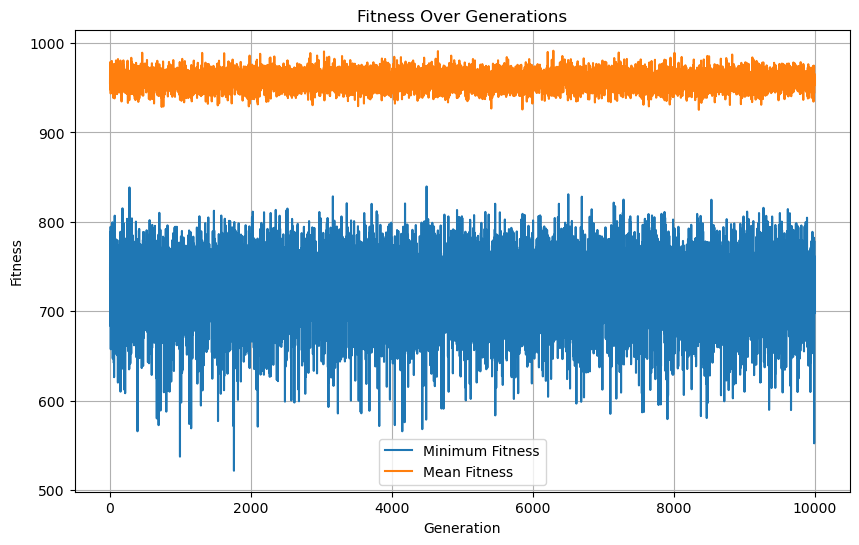

In [19]:
best_solution = [-1, np.inf, np.array([])]
fitness_history = []

for i in range(10000):
    if i % 100 == 0:
        print(i, fitnes_list.min(), fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))
    
    fitnes_list = get_all_fitnes(mutated_pop, cities_dict)

    # Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

    progenitor_list = progenitor_selection(population_set, fitnes_list)
    new_population_set = mate_population(progenitor_list)
    
    mutated_pop = mutate_population(new_population_set)
    
    # Append the minimum and mean fitness to the history
    fitness_history.append([fitnes_list.min(), fitnes_list.mean()])

# Plotting the fitness history
fitness_history = np.array(fitness_history)
plt.figure(figsize=(10, 6))
plt.plot(fitness_history[:, 0], label='Minimum Fitness')
plt.plot(fitness_history[:, 1], label='Mean Fitness')
plt.title('Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.show()


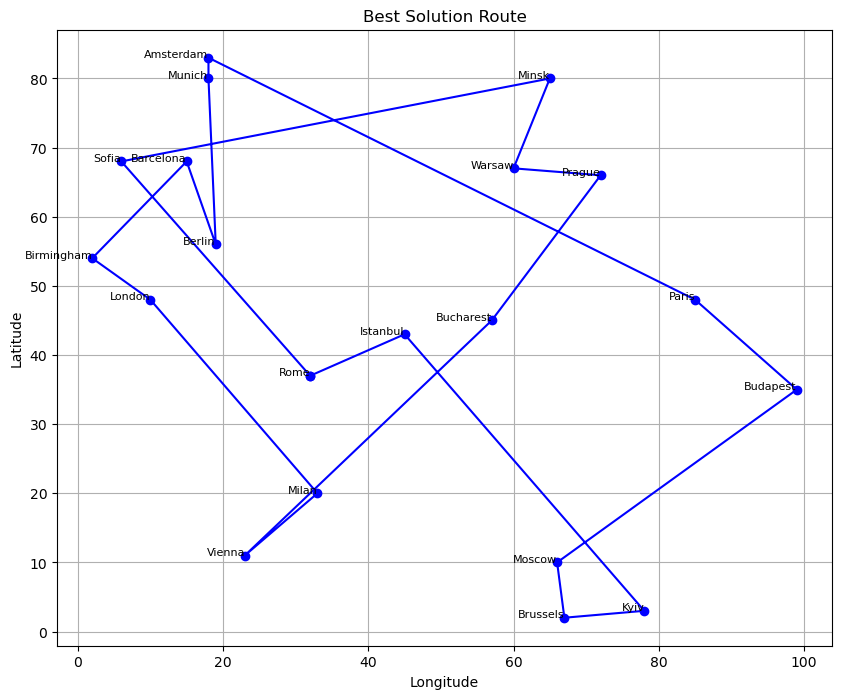

In [18]:
# City coordinates
best_solution_order = best_solution[2][0]

# Extracting coordinates of the best solution
best_solution_coordinates = np.array([cities_dict[city] for city in best_solution_order])

# Adding the starting city at the end to close the loop
best_solution_coordinates = np.vstack([best_solution_coordinates, best_solution_coordinates[0]])

# Plotting the best solution
plt.figure(figsize=(10, 8))
plt.plot(best_solution_coordinates[:, 1], best_solution_coordinates[:, 0], marker='o', linestyle='-', color='b')
plt.title('Best Solution Route')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adding city labels for better identification
for city, (x, y) in cities_dict.items():
    plt.text(y, x, city, fontsize=8, ha='right')

plt.grid(True)
plt.show()

In [17]:
best_solution

[9101,
 499.90953619494417,
 array([['Rome', 'Istanbul', 'Kyiv', 'Brussels', 'Moscow', 'Budapest',
         'Paris', 'Amsterdam', 'Munich', 'Berlin', 'Barcelona',
         'Birmingham', 'London', 'Milan', 'Vienna', 'Bucharest', 'Prague',
         'Warsaw', 'Minsk', 'Sofia']], dtype='<U10')]